In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [4]:
test =  pd.read_csv('C:\\Users\\Ing\\Desktop\\project2.csv')
train = pd.read_csv('C:\\Users\\Ing\\Desktop\\project1.csv')

In [33]:
# data train head 5
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
def bar_plot(variable):
    var =  train[variable]
    vari = var.value_counts()
    
    plt.figure(figsize=(9,3))
    plt.bar(vari.index,vari)
    plt.xticks(vari.index,vari.index.values)
    plt.ylabel("frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,vari))

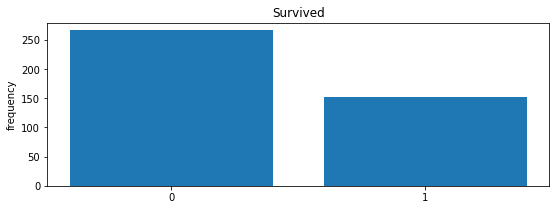

Survived: 
 0    266
1    152
Name: Survived, dtype: int64


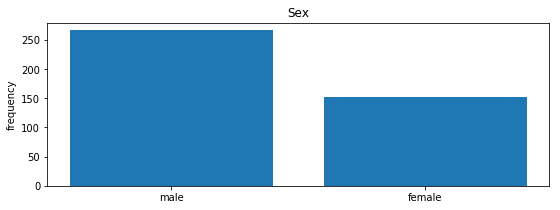

Sex: 
 male      266
female    152
Name: Sex, dtype: int64


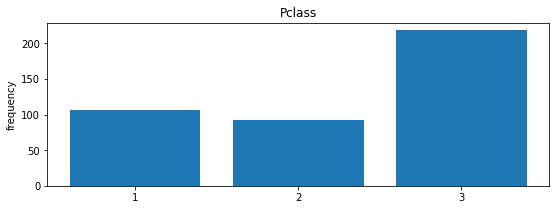

Pclass: 
 3    218
1    107
2     93
Name: Pclass, dtype: int64


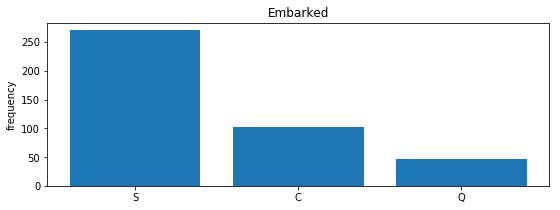

Embarked: 
 S    270
C    102
Q     46
Name: Embarked, dtype: int64


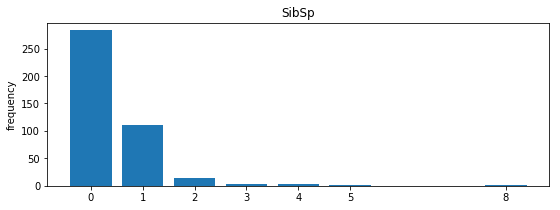

SibSp: 
 0    283
1    110
2     14
4      4
3      4
8      2
5      1
Name: SibSp, dtype: int64


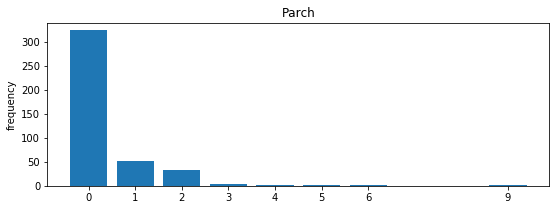

Parch: 
 0    324
1     52
2     33
3      3
9      2
4      2
6      1
5      1
Name: Parch, dtype: int64


In [7]:
# data structure of index
column1 = ["Survived","Sex","Pclass","Embarked","SibSp","Parch"]
for c in column1:
    bar_plot(c)

In [8]:
# Crosstab of surival people from Pclass
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,57,50,107
2,63,30,93
3,146,72,218
All,266,152,418


In [9]:
# Data preparing for machine learning
df = pd.concat((train, test))
dataset1 = df.drop(df.columns[[0, 3, 8,10]], axis=1)
dataset2 = pd.get_dummies(dataset1, columns=['Sex'])
dataset = pd.get_dummies(dataset2, columns=['Embarked'])
X = dataset.iloc[:, 1:12].values
y = dataset.iloc[:, 0].values

In [10]:
#missing DATA
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X[:, 1:12])
X[:, 1:12] = imputer.transform(X[:, 1:12])

In [11]:
X1=df['PassengerId']

In [12]:
#split data into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3,random_state = 0)

In [13]:
#Simple linear model
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
y_pred = classifier.predict(X_test)
y_pred.shape

(437,)

In [22]:
y_pred

array([ 1.00127480e-01,  1.13417954e-01,  8.31682333e-01,  1.65428282e-01,
        7.97046146e-02, -3.10901600e-02,  1.51600007e-01,  1.00506129e+00,
        7.32891054e-01,  8.47022552e-01,  7.58921581e-01,  1.24189253e-01,
        9.35066757e-01,  9.88145634e-01,  1.18768639e-01,  6.41848604e-01,
        7.04637354e-01,  1.46106205e-01,  8.83270552e-01,  2.69392240e-01,
        2.88972173e-01,  2.42093092e-01,  9.37572456e-01,  1.04760549e-01,
        1.37971319e-01,  1.37971319e-01,  6.24321082e-01,  8.90962056e-01,
        1.32365310e-01,  1.85175796e-01,  9.89936888e-01,  7.33789348e-01,
        8.44485658e-01,  8.63091555e-01,  1.72246038e-01,  9.41144990e-01,
        7.37393778e-01,  8.21327957e-01,  3.23113273e-01,  2.19253948e-01,
        1.07994991e-01,  8.69869632e-01,  2.28323652e-01,  1.18279141e-01,
        1.87296685e-01,  1.79907303e-01,  6.87015328e-01,  1.01078139e+00,
        2.25950762e-01, -2.50984835e-02,  6.51712073e-01,  9.63350325e-02,
        6.58814448e-02,  

In [20]:
m = y_pred.shape
p = np.zeros(m, dtype = np.int)
for i in range(len(y_pred)):
        if y_pred[i] > 0.5:
            p[i] = 1
        else:
            p[i] = 0

In [21]:
print("Accuracy: "  + str(np.mean((p[:] == y_test[:]))))

Accuracy: 0.8466819221967964


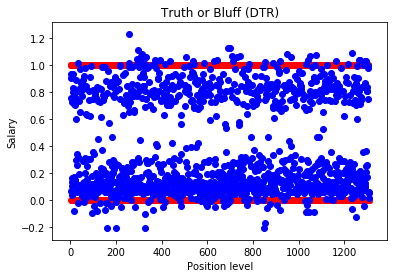

In [23]:
#graph
plt.scatter(X1,y, color = 'red')
plt.scatter(X1, classifier.predict(X), color = 'blue')
plt.title('Truth or Bluff (DTR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


In [25]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0)

classifier1.fit(X_train,y_train)
y_pred1 = classifier1.predict(X_test)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
m = y_pred1.shape
p = np.zeros(m, dtype = np.int)
for i in range(len(y_pred1)):
        if y_pred1[i] > 0.5:
            p[i] = 1
        else:
            p[i] = 0

In [28]:
print("Accuracy: "  + str(np.mean((p[:] == y_test[:]))))

Accuracy: 0.8398169336384439


In [29]:
from sklearn.naive_bayes import GaussianNB
classifier2= GaussianNB()
classifier2.fit(X_train,y_train)
y_pred2 = classifier2.predict(X_test)


In [30]:
m = y_pred2.shape
p = np.zeros(m, dtype = np.int)
for i in range(len(y_pred2)):
        if y_pred2[i] > 0.5:
            p[i] = 1
        else:
            p[i] = 0

In [31]:
print("Accuracy: "  + str(np.mean((p[:] == y_test[:]))))

Accuracy: 0.8260869565217391
